# 기계학습 및 실습 2024년 2학기 중간과제

## 타이타닉 데이터셋 분석 

-인공지능융합학부 안정빈(2020100381)

## 타이타닉 데이터 분석 목차
- [0. 목적 정의](#1-목적-정의)
- [1. 데이터 불러오기](#1-데이터-불러오기)
    - [1-1. 데이터의 변수 정보 파악](#1-1-데이터의-변수-정보-파악)
- [2. 탐색적 분석(EDA)](#2-탐색적-분석eda)
    - [2-1. 단일 변수 파악](#2-1-단일-변수-파악)
    - [2-2. 다중 변수 파악](#2-2-다중-변수-파악)
- [3. 머신러닝](#3-머신러닝)
    - [3-1. 결측치 채우기](#3-1-결측치-채우기)
    - [3-2. 모델 학습](#3-2-모델-학습)
    - [3-3. 정확도 출력](#3-3-정확도-출력)

## 0. 목적 정의

위 프로젝트는 타이타닉 데이터를 분석하여, 탑승객들에 대한 통찰력을 얻는 프로젝트이다.

또한, 얻은 통찰력을 바탕으로 타이타닉 탑승객의 생존 여부를 예측하는 모델을 생성하는 프로젝트이다.

### 1. 데이터 불러오기 <a id="데이터-불러오기"></a>

#### 1-1. 데이터 변수 정보 파악

In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['font.family'] = 'Malgun Gothic'

df=pd.read_csv("./data/train.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [413]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [414]:
df.shape

(891, 11)

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [416]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [417]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


본격적인 EDA를 진행하기 전, 데이터셋을 확인하였다.

승객의 생존 여부, 티켓의 등급, 승객의 이름, 성별, 나이, 같이 탑승한 형제/자매/배우자의 수, 같이 탑승한 부모/자식의 수, 티켓 번호, 요금, 객실 번호, 승선항과 같은 11개의 변수가 존재하고 있으며 총 891개의 데이터가 존재하고 있다.

범주형 변수: 생존 여부, 티켓 등급, 성별, 탑승한 형제/자매/배우자의 수, 같이 탑승한 부모/자식의 수, 승선항

수치(연속)형 변수: 나이, 요금 

문자형 변수: 이름, 티켓 번호, 객실 번호

나이는 177개, 객실 번호는 687개, 승선항은 2개의 결측치를 가지고 있으며, 나머지 변수들은 결측치가 없다.

## 2. 탐색적 분석(EDA)

### 2-1. 단일 변수 파악

먼저, 단일 변수의 특성을 파악해보려 한다. 또한 단일 변수와 생존 여부의 관계 역시 파악해보려 한다.

#### 2-1-1. Survived

전체 인원 수: 891
생존 인원 수: 342
사망 인원 수: 549


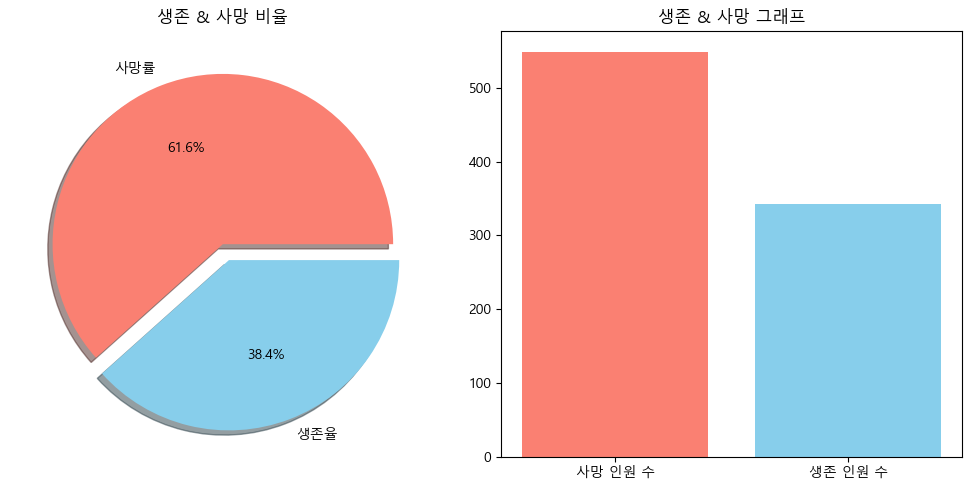

In [418]:
survive=df[df['Survived'] == 1]['Survived'].count()
death=df[df['Survived'] == 0]['Survived'].count()
values=[death,survive]
categories=['사망 인원 수','생존 인원 수']
print("전체 인원 수:", df['Survived'].count())
print("생존 인원 수:", survive)
print("사망 인원 수:", death)

f,ax=plt.subplots(1,2,figsize=(10,5))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',labels=['사망률', '생존율'],ax=ax[0],shadow=True,colors=['salmon', 'skyblue'])
ax[0].set_title('생존 & 사망 비율')
ax[0].set_ylabel('')

ax[1].bar(categories, values ,color=['salmon', 'skyblue'])
ax[1].set_title('생존 & 사망 그래프')

plt.tight_layout()
plt.show()

전체 탑승객 891명 중, 생존 인원은 342, 사망 인원은 549명이다. 

전체 탑승객 중 61.6%가 사망했고, 38.4%만이 생존하였다. 

이 생존 확률을 기준으로, 다양한 상황 중, 언제 생존률이 높고, 낮은지 판단해보려 한다.

#### 2-1-2. Pclass

In [419]:
print("등급 별 탑승객 수:")
df['Pclass'].value_counts()

등급 별 탑승객 수:


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [420]:
print("등급 별 생존/사망 인원 수:")
df.groupby(['Pclass','Survived'])['Survived'].count()

등급 별 생존/사망 인원 수:


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

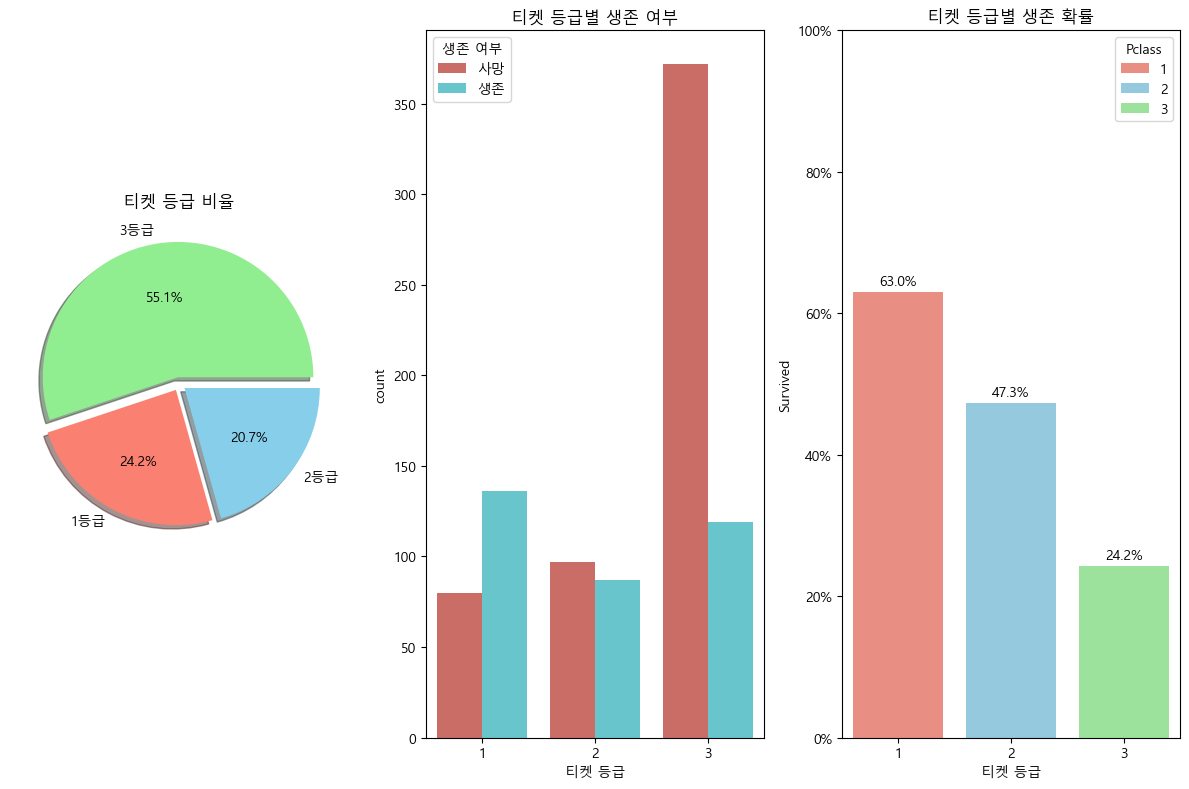

In [421]:
f,ax=plt.subplots(1,3,figsize=(12,8))
df['Pclass'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',labels=['3등급', '1등급','2등급'],
                                     ax=ax[0],shadow=True,colors=['lightgreen','salmon','skyblue'])
ax[0].set_title('티켓 등급 비율')
ax[0].set_ylabel('')

sns.countplot(data=df, x="Pclass", palette='hls', hue='Survived',ax=ax[1])
ax[1].set_title('티켓 등급별 생존 여부')
ax[1].set_xlabel('티켓 등급')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

survival_rates = df.groupby('Pclass')['Survived'].mean().reset_index()

sns.barplot(data=survival_rates, x='Pclass', y='Survived', hue='Pclass', palette=['salmon','skyblue','lightgreen'], ax=ax[2])
ax[2].set_title('티켓 등급별 생존 확률')
ax[2].set_xlabel('티켓 등급')
ax[2].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax[2].set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

for p in ax[2].patches:
    if p.get_height() > 0:  
        ax[2].annotate(f'{p.get_height() * 100:.1f}%', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.tight_layout() 
plt.show()


전체 탑승객 중, 491명, 55.1%가 3등급칸을 이용하였고, 216명,24.2%가 1등급칸을 이용하였으며, 2등급칸은 184명, 20.7%가 이용하였다.

1등급 탑승객의 경우, 생존 확률이 63%로 가장 높은 생존률을 보이고 있다. 2등 탑승객의 경우 생존확률이 47.3%로 50%에는 못 미치지만, 그럼에도 1,2등급 승객은 전체 생존률인 38.4%보다 높은 생존률을 보이고 있다.

반대로, 3등급 탑승객의 경우, 생존확률이 24.2%로 가장 낮은 생존률을 보이며, 전체 생존률보다 14% 정도 낮다.

또한, 두번째 그래프를 보면, 대부분의 사망자가 3등급칸에서 나온 것을 알 수 있다.

이를 통해, 1등급 탑승객이 구명정등을 이용해 제일 먼저 구조되었고, 그 후 2등급, 3등급 순으로 구조되었음을 추측해볼 수 있다.

#### 2-1-3.Sex

In [422]:
print("남녀 탑승객 수:")
df['Sex'].value_counts()

남녀 탑승객 수:


Sex
male      577
female    314
Name: count, dtype: int64

In [423]:
print("남녀 생존 사망 인원 수:")
df.groupby(['Sex','Survived'])['Survived'].count()

남녀 생존 사망 인원 수:


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

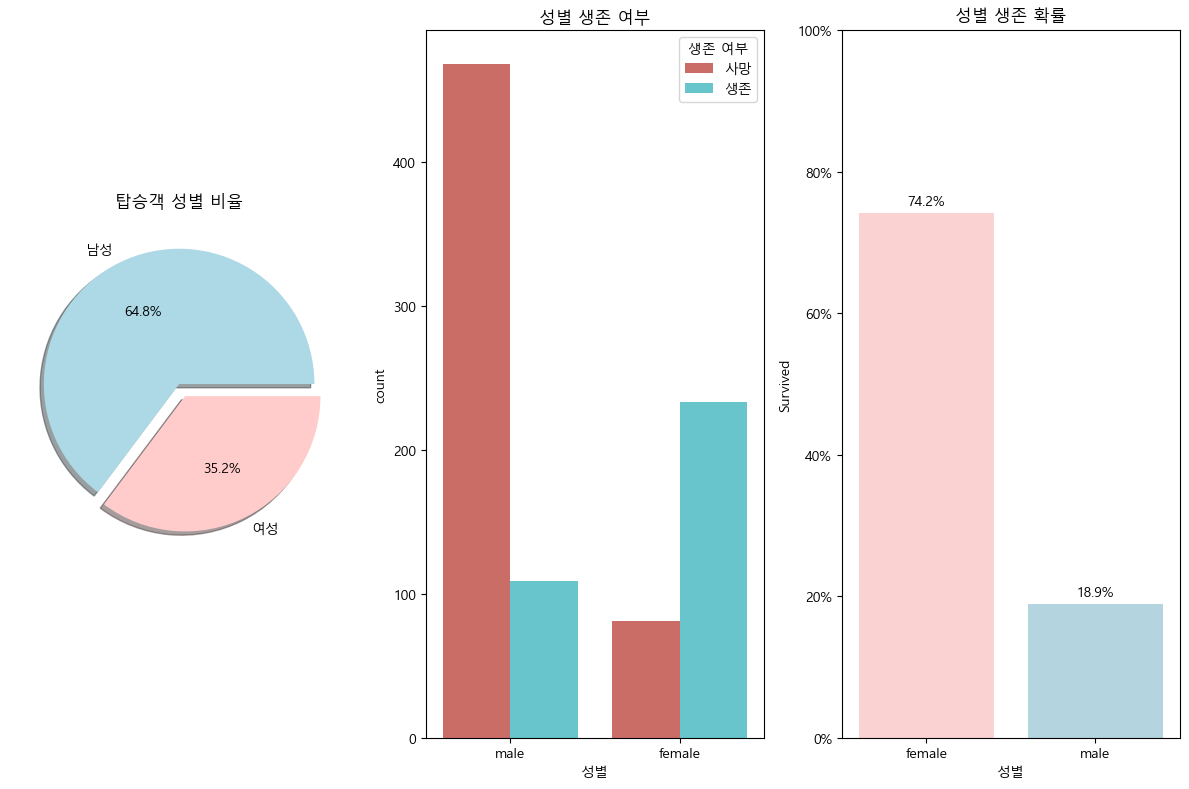

In [424]:
f, ax = plt.subplots(1, 3, figsize=(12, 8))

df['Sex'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', labels=['남성', '여성'], ax=ax[0], shadow=True,colors=["#ADD8E6", "#FFCCCB"])
ax[0].set_title('탑승객 성별 비율')
ax[0].set_ylabel('')

sns.countplot(data=df, x="Sex", palette='hls', hue='Survived', ax=ax[1])
ax[1].set_title('성별 생존 여부')
ax[1].set_xlabel('성별')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

survival_rates_by_gender = df.groupby('Sex')['Survived'].mean().reset_index()
sns.barplot(data=survival_rates_by_gender, x='Sex', y='Survived', hue='Sex', palette=["#FFCCCB","#ADD8E6"], ax=ax[2])
ax[2].set_title('성별 생존 확률')
ax[2].set_xlabel('성별')
ax[2].set_ylim(0, 1)
ax[2].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax[2].set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

for p in ax[2].patches:
    ax[2].annotate(f'{p.get_height() * 100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.tight_layout()
plt.show()


남성 탑승객의 비율은 64.8% 여성 탑승객의 비율은 35.2%로 남성 탑승객의 비율이 더 높은 것을 알 수 있다.

그러나 남성의 생존률은 18.9%로 매우 낮은 반면, 여성의 생존률은 74.2%로 매우 높은 것을 확인할 수 있다.

두번째 그래프를 보면, 전체 사망자의 80%이상이 남자이며, 생존자의 30%정도만 남자인 것 역시 확인할 수 있다.

이를 통해 여성이 구조 우선순위였음을 유추해볼 수 있다.

#### 2-1-4. SibSp

In [425]:
print("탑승한 동반자 수(형제, 자매, 배우자)")
df['SibSp'].value_counts()

탑승한 동반자 수(형제, 자매, 배우자)


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [426]:
survival_by_SibSp = pd.crosstab(df['SibSp'],df['Survived'],  normalize='index').style.background_gradient(cmap='viridis', axis=None)

print("동반자(형제/자매/배우자)수 별 생존률")
survival_by_SibSp

동반자(형제/자매/배우자)수 별 생존률


Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


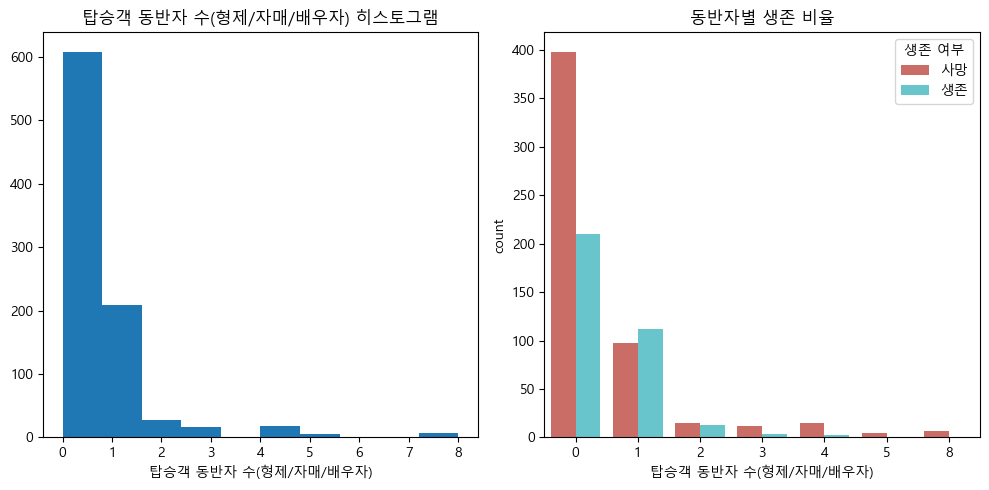

In [427]:
f,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(df['SibSp'])
ax[0].set_title('탑승객 동반자 수(형제/자매/배우자) 히스토그램')
ax[0].set_xlabel('탑승객 동반자 수(형제/자매/배우자)')

sns.countplot(data=df, x="SibSp", palette='hls', hue='Survived',ax=ax[1])
ax[1].set_title('동반자별 생존 비율')
ax[1].set_xlabel('탑승객 동반자 수(형제/자매/배우자)')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

plt.tight_layout()
plt.show()

891명의 승객중 608명의 승객이 형제,자매, 배우자 등과 탑승하지 않은 것으로 드러났다.
그 외 209명의 승객이 1명의 동반자와 탑승하였다. 즉 대부분의 승객들이 1명 이하의 형제, 자매, 배우자와 탑승한 것을 알 수 있다.

동반자 수와 생존률을 같이 확인해보면, 1,2명의 동반자가 있을 때 제일 높은 생존율을 보이는 것을 알 수 있다. 

표본이 작지만, 4,5,8명의 동반자 즉 많은 동반자와 탑승한 승객의 생존률이 매우 낮은 것을 알 수 있다. 

형제/자매/배우자와 같은 동반자와 탑승한 승객이 더 좋은 객실(1,2)등급을 사용하였거나, 구조 우선 순위였을 가능성이 존재한다.

#### 2-1-5. Parch

In [428]:
print("탑승한 동반자 수(부모/자녀)")
df['Parch'].value_counts()

탑승한 동반자 수(부모/자녀)


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [429]:
survival_by_Parch = pd.crosstab( df['Parch'],df['Survived'], normalize='index').style.background_gradient(cmap='viridis', axis=None)

print("동반자(부모/자녀)수 별 생존률")
survival_by_Parch

동반자(부모/자녀)수 별 생존률


Survived,0,1
Parch,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.400000,0.600000
4,1.000000,0.000000
5,0.800000,0.200000
6,1.000000,0.000000


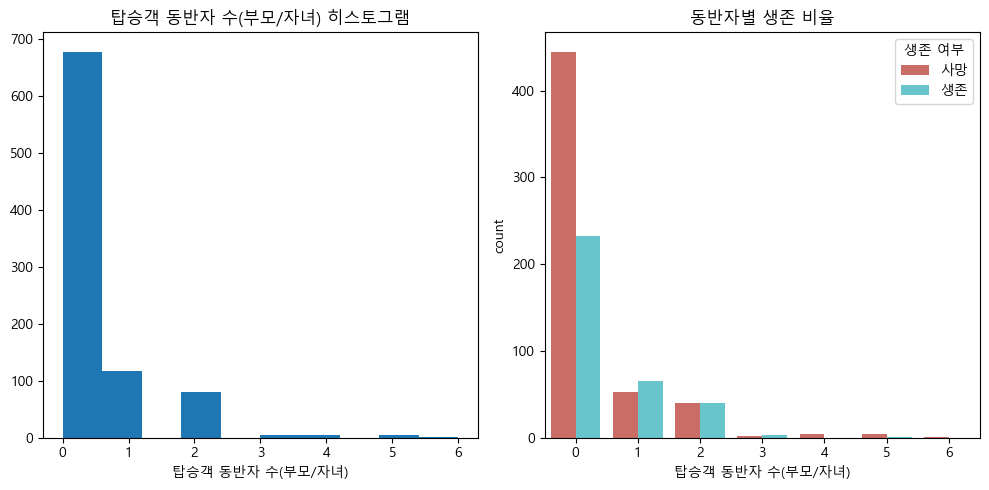

In [430]:
f,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(df['Parch'])
ax[0].set_title('탑승객 동반자 수(부모/자녀) 히스토그램')
ax[0].set_xlabel('탑승객 동반자 수(부모/자녀)')

sns.countplot(data=df, x="Parch", palette='hls', hue='Survived',ax=ax[1])
ax[1].set_title('동반자별 생존 비율')
ax[1].set_xlabel('탑승객 동반자 수(부모/자녀)')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

plt.tight_layout()
plt.show()

부모/자녀 없이 혼자 탑승한 고객이 678명으로 제일 많으며, 1명의 부모/자녀와 탑승한 고객이 118명, 2명의 부모/자녀와 탑승한 고객이 80명으로 대부분을 차지하고 있다.

위와 마찬가지로, 1명,2명의 부모/자녀와 탑승한 고객의 생존률이 50%이상임을 알 수 있다.

더 확인해봐야겠지만, 1,2명의 부모/자녀와 탑승한 고객들이 높은 등급의 객실에 머물렀을 가능성이 높거나, 구조 우선순위였음이 예상된다.

#### 2-1-6. Age

In [431]:
bins = range(0, 86, 5) 
labels = [f'{i}-{i+4}' for i in bins[:-1]] 

df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df['Age_group'].value_counts()

Age_group
20-24    114
25-29    106
30-34     95
15-19     86
35-39     72
40-44     48
45-49     41
0-4       40
50-54     32
5-9       22
10-14     16
55-59     16
60-64     15
70-74      6
65-69      4
80-84      1
75-79      0
Name: count, dtype: int64

In [432]:
survival_by_age = pd.crosstab(df['Age_group'],df['Survived'], normalize='index')
survival_by_age = survival_by_age.style.background_gradient(cmap='viridis', axis=None)
print("나이대 별 생존률")
survival_by_age


나이대 별 생존률


Survived,0,1
Age_group,,
0-4,0.325000,0.675000
5-9,0.500000,0.500000
10-14,0.562500,0.437500
15-19,0.604651,0.395349
20-24,0.657895,0.342105
25-29,0.641509,0.358491
30-34,0.578947,0.421053
35-39,0.541667,0.458333
40-44,0.625000,0.375000


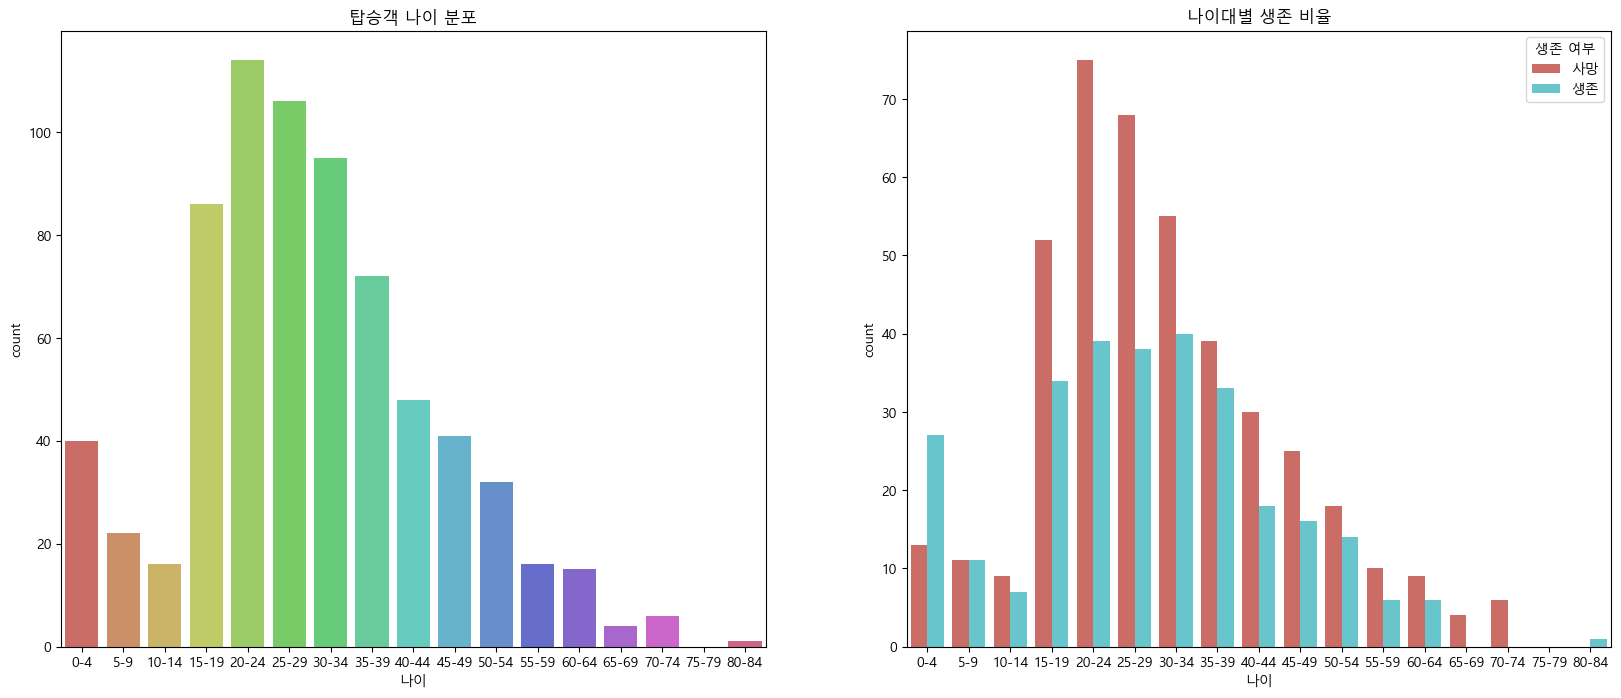

In [433]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(data=df, x="Age_group", palette='hls', ax=ax[0], legend=False)
ax[0].set_title('탑승객 나이 분포')
ax[0].set_xlabel('나이')

sns.countplot(data=df, x="Age_group",palette='hls', hue='Survived', ax=ax[1])
ax[1].set_title('나이대별 생존 비율')
ax[1].set_xlabel('나이')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')
plt.show()

탑승객의 나이의 분포와, 생존 비율을 확인해보기 위해서, 5살 단위로, 승객들을 분리하였다.

전반적인 분포를 확인해보면, 15~34세 나이의 승객이 제일 많이 탑승하였고, 55세 이후의 승객들은 최대 20명으로 적은 비율을 보이고 있다. 또한 40명의 영유아들이 타이타닉호를 탑승했음을 알 수 있다. 

나이대별 생존 비율 그래프를 보면 14세 미만의 아이들의 생존률이 제일 높게 나타나고 있다. 특히 0~4세 유아들의 생존률은 66%이상으로 보인다. 어린 아이들을 우선적으로 구조했음을 예상해볼 수 있다. 

반대로, 20~29세 사이의 승객들이 제일 많이 사망하였으며, 생존률 역시 제일 낮게 나타나 보인다. 신체적으로 제일 건강한 나이이기에, 구조 후순위였거나, 다른 승객들에 비해 3등급칸 이용 비율이 높았을 수 있다.




#### 2-1-7. Embarked

In [434]:
print("승선항별 탑승 인원 수:")
df['Embarked'].value_counts()

승선항별 탑승 인원 수:


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [435]:
print("승선항별 생존 사망 인원 수:")
df.groupby(['Embarked','Survived'])['Survived'].count()

승선항별 생존 사망 인원 수:


Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

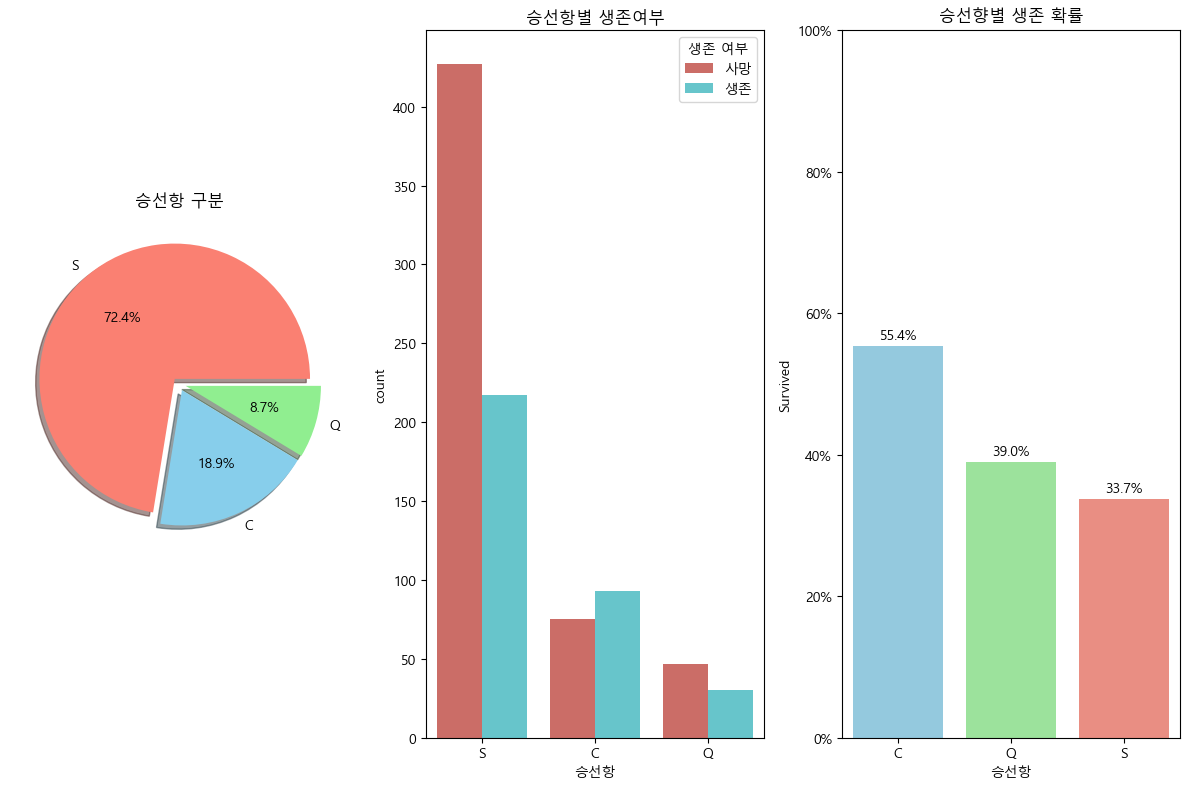

In [436]:
f,ax=plt.subplots(1,3,figsize=(12,8))
df['Embarked'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',
                                       colors=['salmon','skyblue','lightgreen'], ax=ax[0],shadow=True)
ax[0].set_title("승선항 구분")
ax[0].set_ylabel('')

sns.countplot(data=df, x="Embarked",palette='hls', hue='Survived', ax=ax[1])
ax[1].set_title('승선항별 생존여부')
ax[1].set_xlabel('승선항')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

survival_rates_embarked = df.groupby('Embarked')['Survived'].mean().reset_index()
sns.barplot(data=survival_rates_embarked, x='Embarked', y='Survived', hue='Embarked', palette=['skyblue','lightgreen','salmon'], ax=ax[2])
ax[2].set_title('승선향별 생존 확률')
ax[2].set_xlabel('승선항')
ax[2].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax[2].set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

for p in ax[2].patches:
    ax[2].annotate(f'{p.get_height() * 100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.tight_layout() 
plt.show()



'S' 항구에서 승선한 승객은 전체 탑승객의 72.4%로, 대부분의 승객이 'S'항구에서 승선하였다. 그러나 생존률은 33.7%로, 제일 낮은 생존률을 보이고 있다.

'C' 항구에서 탑승한 승객들은 55.4%의 생존률을 보이고 있으며, 'Q' 항구에서 탑승한 승객들은 39%의 생존률로, 전체 생존률(38.4%)와 비슷한 생존률을 보이고 있다.

이를 통해 'C' 항구에서 탑승한 승객들은 높은 등급의 객실을 이용했거나, 여성의 비율이 많았음을 유추해볼 수 있다.

#### 2-1-8. Fare

In [437]:
print('최고 요금:',df['Fare'].max())
print('최저 요금:',df['Fare'].min())
print('전체 평균 요금:',df['Fare'].mean())
print('1 등급 평균 요금:', df[df['Pclass'] == 1]['Fare'].mean())
print('2 등급 평균 요금:', df[df['Pclass'] == 2]['Fare'].mean())
print('3 등급 평균 요금:', df[df['Pclass'] == 3]['Fare'].mean())
print('요금 표준편차:',df['Fare'].std())

최고 요금: 512.3292
최저 요금: 0.0
전체 평균 요금: 32.204207968574636
1 등급 평균 요금: 84.1546875
2 등급 평균 요금: 20.662183152173913
3 등급 평균 요금: 13.675550101832993
요금 표준편차: 49.6934285971809


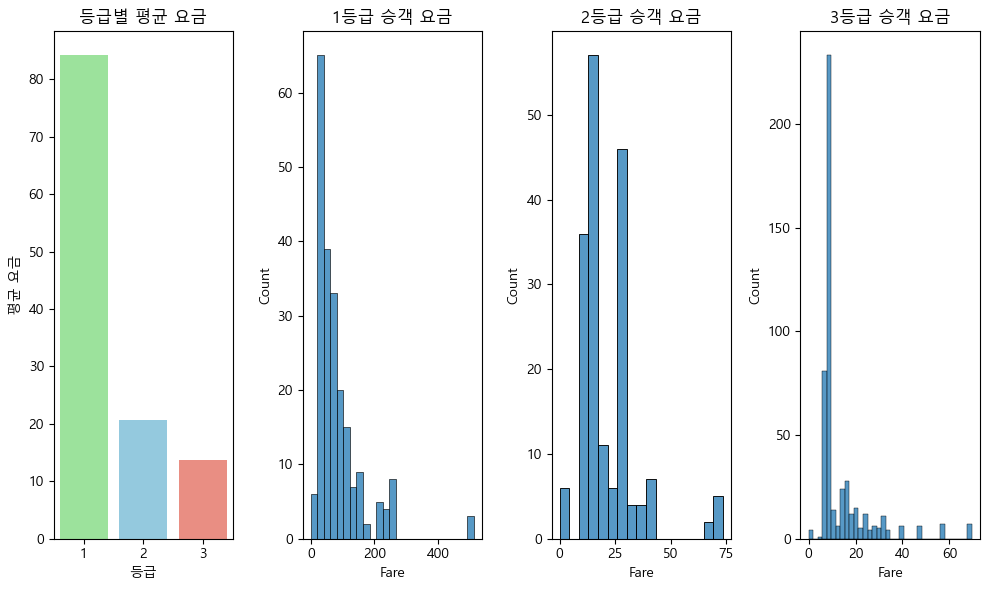

In [438]:
f,ax=plt.subplots(1,4,figsize=(10,6))

average_fare_by_class = df.groupby('Pclass')['Fare'].mean().reset_index()
sns.barplot(x='Pclass', y='Fare', data=average_fare_by_class, palette=['lightgreen','skyblue','salmon'],ax=ax[0])
ax[0].set_title('등급별 평균 요금')
ax[0].set_xlabel('등급')
ax[0].set_ylabel('평균 요금')

sns.histplot(df[df['Pclass']==1].Fare,ax=ax[1])
ax[1].set_title('1등급 승객 요금')
sns.histplot(df[df['Pclass']==2].Fare,ax=ax[2])
ax[2].set_title('2등급 승객 요금')
sns.histplot(df[df['Pclass']==3].Fare,ax=ax[3])
ax[3].set_title('3등급 승객 요금')
plt.tight_layout()
plt.show()

Fare, 요금은 티켓 등급과 관련이 깊은 변수라 판단하여, 전체 평균 요금과 티켓 등급별 요금을 확인하였다.

확인 결과 3등급 티켓보다 2등급 티켓의 평균 가격이 1.5배 정도 비싼 것을 알 수 있다. 그러나 1등급 티켓은 2등급 티켓보다 4배 정도의 평균 가격을 보이고 있다.

이를 통해 1등급 티켓의 가격이 2,3등급 티켓보다 월등히 비쌌다는 것을 알 수 있다.

2,3 등급의 그래프를 보면 대부분이 40달러 안에 위치하는 것을 볼 수 있다. 그러나 1등급의 그래프를 보면 100달러 이상의 값들도 꽤 존재하는 것을 알 수 있다.


#### 2-1-9 Ticket

In [439]:
ticket_counts = df['Ticket'].value_counts()
ticket_counts_filtered = ticket_counts[ticket_counts >= 2].reset_index()

ticket_counts_filtered.columns = ['Ticket', 'Count']

print(ticket_counts_filtered)

              Ticket  Count
0             347082      7
1               1601      7
2           CA. 2343      7
3            3101295      6
4            CA 2144      6
..               ...    ...
129           392096      2
130      S.O./P.P. 3      2
131       W./C. 6607      2
132  S.C./PARIS 2079      2
133        A/4 48871      2

[134 rows x 2 columns]


In [440]:
df[df['Ticket'] == '347082']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
PassengerId,,,,,,,,,,,,
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,35-39
120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,0-4
542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S,5-9
543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,10-14
611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S,35-39
814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S,5-9
851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S,0-4


31.275라는 같은 티켓을 확인해보니, 이름이 같고, SibSp와 Farch가 같은 값이기에 가족임을 확인할 수 있었다.

Andersson, Mr. Anders Johan와 Andersson, Mrs. Anders Johan (Alfrida Konstant...)은 부부사이이며, 5명의 자녀가 있었음을 알 수 있다.

안타깝게도, 이들 가족 모두 사망하였다.

In [441]:
df[df['Ticket'] == '1601']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
PassengerId,,,,,,,,,,,,
75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,30-34
170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,25-29
510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,25-29
644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,NaN
693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,NaN
827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,NaN
839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,30-34


그 다음으로 많은 티켓 번호인 1601을 확인해보았으나, SibSp나, Parch가 모두 0이여서 가족 관계를 확인할 수 없었다.

그러나, Lee와 Larm이 이름에 포함된 사람이 2명이기에, 그들이 가족관계임을 의심해볼 수 있다.

In [442]:
df[df['Ticket'] == 'CA. 2343']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
PassengerId,,,,,,,,,,,,
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN


이들 7명 역시 SibSp와 Parch 그리고 sage라는 이름을 통해 그들이 형제.자매 임을 파악할 수 있었다.

In [443]:
df[df['Ticket'] == '3101295']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
PassengerId,,,,,,,,,,,,
51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,5-9
165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S,0-4
267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S,15-19
639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S,40-44
687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S,10-14
825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S,0-4


이들 역시, 가족이다.
어머니 Panula, Mrs. Juha (Maria Emilia Ojala)와 5명의 자식이 같이 탑승한 것을 알 수 있다.

In [444]:
df[df['Ticket'] == 'CA 2144']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
PassengerId,,,,,,,,,,,,
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S,10-14
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S,15-19
387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S,0-4
481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S,5-9
679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S,40-44
684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S,10-14


티켓 번호를 통해, 몇몇 가족을 발견할 수 있었다. 

티켓 번호가 같으면, 대부분 가족 관계임을 파악할 수 있었다. 

그러나 두번째 티켓 번호인 1601처럼 아닌 경우도 존재하기에 확신할 수는 없다.

#### 2-1-10 Name

In [445]:
df['LastName'] = df['Name'].apply(lambda x: x.split(',')[0])
df['Initial'] = df.Name.str.extract('([A-Za-z]+)\\.')

df['LastName'].value_counts()


LastName
Andersson    9
Sage         7
Johnson      6
Skoog        6
Carter       6
            ..
Banfield     1
Sutehall     1
Montvila     1
Behr         1
Vestrom      1
Name: count, Length: 667, dtype: int64

In [446]:
df['Initial'].value_counts()

Initial
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [447]:
df[df['LastName'] == 'Johnson']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,LastName,Initial
PassengerId,,,,,,,,,,,,,,
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,25-29,Johnson,Mrs
173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S,0-4,Johnson,Miss
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,15-19,Johnson,Mr
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S,45-49,Johnson,Mr
720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S,30-34,Johnson,Mr
870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,0-4,Johnson,Master


어머니Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)와 Johnson, Master. Harold Theodor, Johnson, Miss. Eleanor Ileen와 두 자녀가 가족관계로 보인다.

In [448]:
df[df['LastName'] == 'Skoog']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,LastName,Initial
PassengerId,,,,,,,,,,,,,,
64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,NaN,S,0-4,Skoog,Master
168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,NaN,S,45-49,Skoog,Mrs
361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,NaN,S,40-44,Skoog,Mr
635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,NaN,S,5-9,Skoog,Miss
643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,NaN,S,0-4,Skoog,Miss
820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,NaN,S,10-14,Skoog,Master


아버지 Skoog, Mr. Wilhelm와 어머니 Skoog, Mrs. William (Anna Bernhardina Karlsson) 그리고 4명의 자녀가 함께 탑승한 것으로 보인다.

In [449]:
df.drop('LastName', axis=1, inplace=True)


탑승객의 이름에서 성만 출력하여, 가족 관계를 파악할 수 있었다. 

또한, 영미권에선 mrs, mr, miss, master와 같은 호칭이 이름에 존재한다. 이를 통해 성별과, 결혼 여부를 파악할 수 있다.

또한 대략적인 나이를 가늠해볼 수 있다. 그러므로 같은 칭호를 가진 사람들의 평균 나이를 구해, age 결측치를 채우는데 사용할 수 있다.

age 결측치는 3번째 단계에서 진행하겠다.

#### 2-1-11. Cabin

In [450]:
df['Cabin'].isnull().sum()

np.int64(687)

In [451]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [452]:
df[df['Cabin'] == 'B96 B98']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Initial
PassengerId,,,,,,,,,,,,,
391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S,35-39,Mr
436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S,10-14,Miss
764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S,35-39,Mrs
803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S,10-14,Master


In [453]:
df[df['Cabin'] == 'C23 C25 C27']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Initial
PassengerId,,,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,15-19,Mr
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,20-24,Miss
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,20-24,Miss
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,60-64,Mr


마찬가지로, 객실 번호를 통해서도, 가족 관계를 유추해볼 수 있다. 

그러나 결측치가 절반 이상이므로, 불필요한 변수라고 생각된다.

#### 2-1-12 최종 정리

단일 변수 시각화 파악한 내용을 요약해보려 한다.

Survived: 전체 탑승객의 생존률 파악, 상황별 생존률의 기준점

Pclass: 3등급 탑승객이 절반 이상, 1,2,3등급 순서대로 생존률이 높음

Sex: 남성이 여성보다 많이 탑승, 여성의 생존률이 남성보다 훨씬 높음

age: 15세 부터 35세 사이 탑승객이 제일 많음, 0세에서 14세의 생존률이 제일 높고, 20~29세 사망률이 제일 높음

SibSp: 60% 정도의 승객이 혼자 탑승 1,2명의 형제/자매/배우자와 탑승한 승객의 생존률이 제일 높음

Parch: 70% 정도의 승객이 혼자 탑승, 1,2명의 부모/자녀와 탑승한 승객의 생존률이 제일 높음

Embarked: 70% 이상의 승객이 'S'에서 탑승 그러나 제일 생존률이 낮음 'C'에서 탑승한 승객의 생존률이 제일 높음

Fare: 2,3 등급의 평균 가격은 비슷하나, 1등급의 평균 가격이 매우 비쌈

Ticket: 티켓 번호를 활용해 가족 찾기 가능

Name: 성을 이용해 가족 찾기, 호칭을 이용해 나이 결측치 문제 해결

cabin: 마찬가지로 가족 찾기 가능, 그러나 결측치가 매우 많이 존재

### 2-2. 다중 변수 파악 

더 많은 정보를 얻기 위해, 여러 변수를 조합하여, 인사이트를 찾으려 한다.

#### 2-2-1. Sex, PClass, Survived

앞서 살펴본 시각화에 따르면, 티켓 등급이 높을수록, 성별이 여성일 때 높은 생존률을 보였다.

성별과, 티켓 등급 그리고 생존 여부를 통해, 각 티켓 등급에 몇명의 남녀가 탑승했고, 생존률은 어떻게 되는지 보다 자세히 살펴보려한다.

In [454]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [455]:
ticket_class_female_ratio = df[df['Sex'] == 'female'].groupby('Pclass').size() / df.groupby('Pclass').size()

print('티켓 등급 별 여성의 비율:',ticket_class_female_ratio)

티켓 등급 별 여성의 비율: Pclass
1    0.435185
2    0.413043
3    0.293279
dtype: float64


In [456]:
male_survival_rate = df[df['Sex'] == 'male'].groupby('Pclass')['Survived'].mean() * 100
female_survival_rate = df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].mean() * 100

survival_rate_table = pd.DataFrame({
    '남성 생존률 (%)': male_survival_rate,
    '여성 생존률 (%)': female_survival_rate
})
print(survival_rate_table)

        남성 생존률 (%)  여성 생존률 (%)
Pclass                        
1        36.885246   96.808511
2        15.740741   92.105263
3        13.544669   50.000000


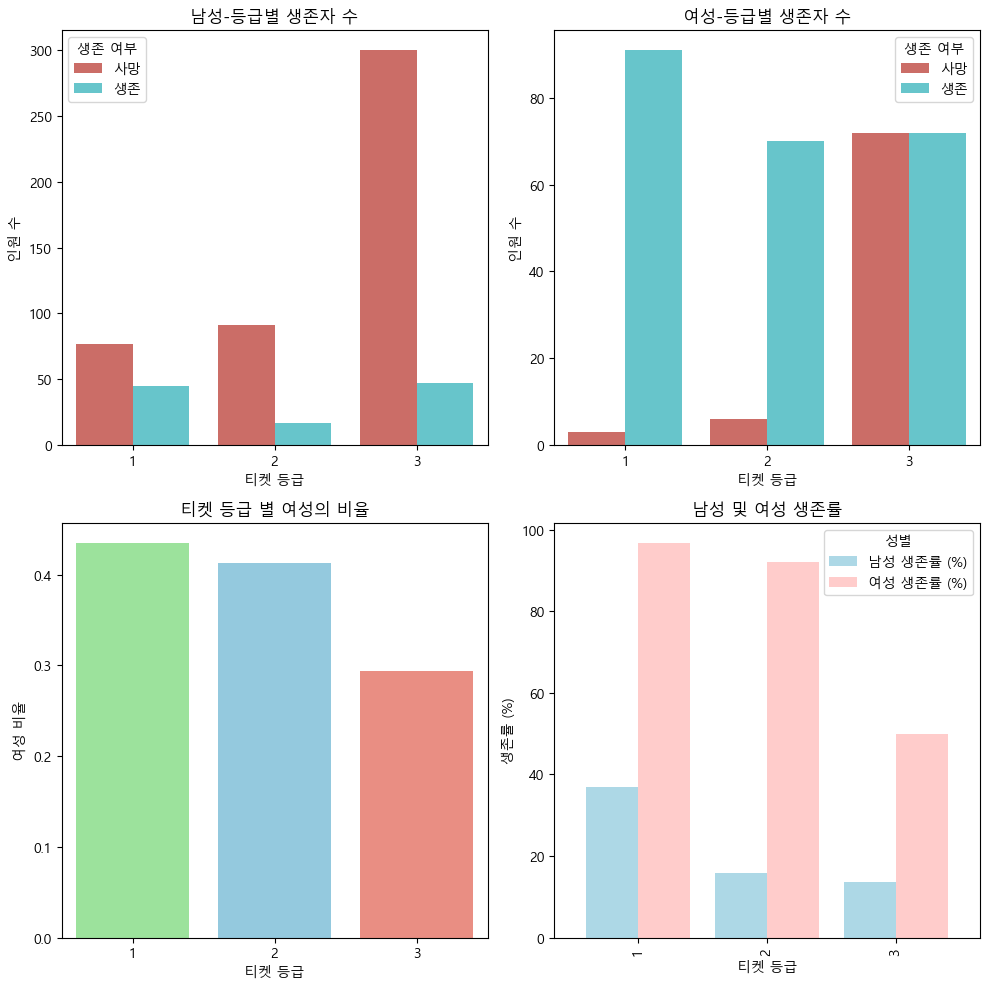

In [457]:
f,ax=plt.subplots(2,2,figsize=(10,10))

sns.countplot(data=df[df['Sex'] == 'male'], x='Pclass', hue='Survived',palette='hls',ax=ax[0,0])
ax[0,0].set_title('남성-등급별 생존자 수')
ax[0,0].set_xlabel('티켓 등급')
ax[0,0].set_ylabel('인원 수')

sns.countplot(data=df[df['Sex'] == 'female'], x='Pclass', hue='Survived',palette='hls',ax=ax[0,1])
ax[0,1].set_title('여성-등급별 생존자 수')
ax[0,1].set_xlabel('티켓 등급')
ax[0,1].set_ylabel('인원 수')
new_labels = ['사망', '생존']
for a in [ax[0, 0], ax[0, 1]]: 
    handles, _ = a.get_legend_handles_labels()
    a.legend(handles, new_labels, title='생존 여부')

sns.barplot(x=ticket_class_female_ratio.index, y=ticket_class_female_ratio.values, palette=['lightgreen','skyblue','salmon'], ax=ax[1,0])
ax[1,0].set_title('티켓 등급 별 여성의 비율')
ax[1,0].set_xlabel('티켓 등급')
ax[1,0].set_ylabel('여성 비율')

survival_rate_table.plot(kind='bar', color=["#ADD8E6","#FFCCCB"], width=0.8,ax=ax[1,1])
ax[1,1].set_title('남성 및 여성 생존률')
ax[1,1].set_xlabel('티켓 등급')
ax[1,1].set_ylabel('생존률 (%)')
ax[1,1].legend(title='성별')
plt.tight_layout()
plt.show()

먼저, 티켓 등급 별 여성의 비율은 1등급이 제일 높고, 3등급이 제일 낮음을 알 수 있다.

그래프를 확인해보면, 1 등급과 2등급에 탑승한 여성은 90% 이상 생존하였고, 3등급에 탑승한 여성 역시 절반이 생존한 것을 알 수 있다.

그에 비해, 남성은 매우 낮은 생존률을 보이고 있는데, 1등급에 탑승한 남자의 생존률이 37%이고 나머지는 16%아래의 생존률을 보이고 있다.

정리하자면 1,2등급의 생존률이 더 높은 만큼, 상위 등급을 더 많은 인력과 장비를 사용하여 구조하였을 것이다. 그 중 여성을 먼저 구조하였기 때문에, 3등급칸의 여성 생존률이 나중에 구조된 1등급 칸의 남성 생존률보다 높다고 생각한다. 

또한 3등급 칸의 여성 비율이 더 높았다면, 3등급 칸의 생존률도 올라갔을 것으로 예상된다.

#### 2-2-2. Age,Pclass,Survived

0세 부터 14세 사이의 어린아이들이 높은 생존률을 보였고, 20~29세 청년들이 낮은 생존률을 보였다.

나이대별로, 티켓 등급에 차이가 존재하는지 확인해보려한다.

In [458]:
# 티켓 등급별 나이 평균 계산
average_age_by_class = df.groupby('Pclass')['Age'].mean()

# 결과 출력
print(average_age_by_class)


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [459]:
survival_by_age = pd.crosstab(df['Age_group'],df['Pclass'], normalize='index')
survival_by_age = survival_by_age.style.background_gradient(cmap='summer_r', axis=None)
print("나이대 별 탑승 티켓 분류")
survival_by_age

나이대 별 탑승 티켓 분류


Pclass,1,2,3
Age_group,,,
0-4,0.075000,0.300000,0.625000
5-9,0.000000,0.227273,0.772727
10-14,0.125000,0.125000,0.750000
15-19,0.186047,0.186047,0.627907
20-24,0.157895,0.201754,0.640351
25-29,0.150943,0.283019,0.566038
30-34,0.189474,0.336842,0.473684
35-39,0.444444,0.222222,0.333333
40-44,0.291667,0.250000,0.458333


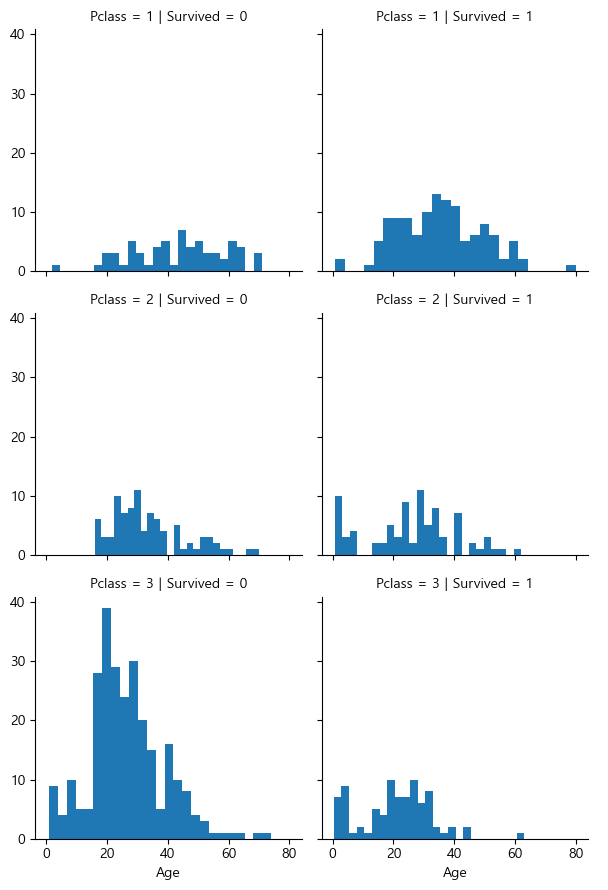

In [460]:
g = sns.FacetGrid(df, col = "Survived", row = "Pclass")
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

우선 티켓 등급별 평균 나이를 구해보면, 1등급 티켓의 평균 나이가 제일 높은 것을 알 수 있다.

또한 교차표를 보면 45세 이상부터는 절반 이상이 1등급석을 사용한 것을 확인할 수 있다.

그에 비해 0~30세까지는 절반 이상이 3등급석을 사용한 것을 확인할 수 있다.

이러한 결과는 티켓의 가격과 관련이 있어보인다. 경제적으로 좀 더 여유가 있는 중장년층 부터는 1등급을 주로 이용하고, 상대적으로 돈이 부족한 20세부터 30세 그리고 그들의 어린 자녀들 역시 3등급칸을 주로 이용하는 경향을 보이고 있다.

그럼에도 위에서 확인했던것처럼, 유아들의 생존률이 높게 나타난 현상은, 성인보다 어린 아이들을 우선적으로 구조했음을 의미한다. 

또한 20세부터 29세까지의 생존률이 낮게 나타난 것은, 절반 이상의 20대 승객들이 3등급칸을 이용했기에 나온 결과라고 생각한다.

#### 2-2-3. Embarked, Pclass, Sex, Survived

위에서 확인한 결과 'S' 승선항에서 제일 많은 탑승객이 승선하였으나, 제일 낮은 생존률을 보였다.

또한 'C' 승선항은 55%를 넘는 생존률을 보였다.

승선항별로, 남녀 비율 그리고, 티켓 등급 비율을 확인하여, 왜 승선항별로 생존률에 차이를 보이는지 파악해보려한다.

In [461]:
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='summer_r')

In [462]:
print('승선항 별 티켓 등급 비율:')

embarked_pclass_ratio = pd.crosstab(df['Embarked'], df['Pclass'], normalize='index')
embarked_pclass_ratio

승선항 별 티켓 등급 비율:


Pclass,1,2,3
Embarked,,,
C,0.505952,0.101190,0.392857
Q,0.025974,0.038961,0.935065
S,0.197205,0.254658,0.548137


In [463]:
print("승선항 별 남녀 비율")

embarked_sex_ratio = pd.crosstab(df['Embarked'], df['Sex'], normalize='index')
embarked_sex_ratio

승선항 별 남녀 비율


Sex,female,male
Embarked,,
C,0.434524,0.565476
Q,0.467532,0.532468
S,0.315217,0.684783


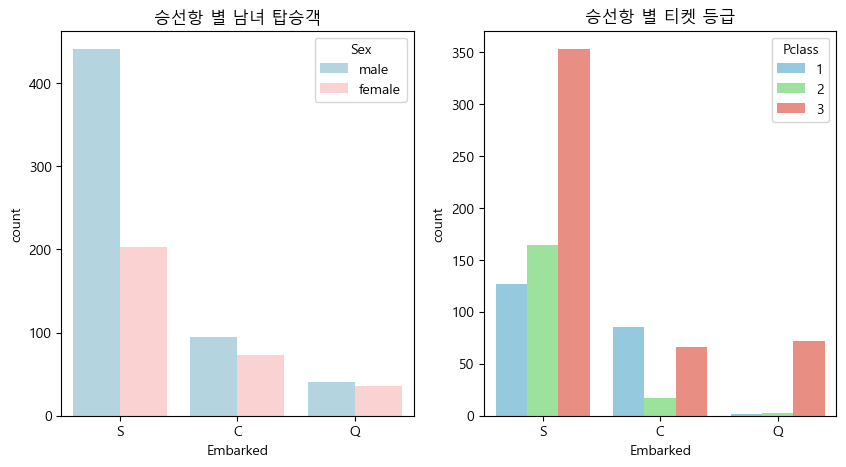

In [464]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=df,x='Embarked',hue='Sex', palette=["#ADD8E6","#FFCCCB"],ax=ax[0])
ax[0].set_title('승선항 별 남녀 탑승객')

sns.countplot(data=df,x='Embarked',hue='Pclass',palette=['skyblue','lightgreen','salmon'],ax=ax[1])
ax[1].set_title('승선항 별 티켓 등급')
plt.show()

다음의 표를 보면, 생존률이 제일 높던 'C'에서 승선한 탑승객의 50%가 1등급 좌석을 사용한 것과, 탑승객의 43%가 여성인 것을 알 수 있다. 

이를 통해 'C'에서 승선한 고객의 생존률이 높은 이유는, 높은 등급의 객실을 탑승한 것으로 유추할 수 있다.

'Q'에서 승선한 탑승객은 93.5%가 3등급 좌석을 사용하였다. 그러나 다른 승선항에 비해 여성의 비율이 제일 높아, 'S' 승선항 승객들에 비해 조금 더 높은 생존률을 보인 것으로 생각된다.

'S'에서 승선한 탑승객은 54.7%가 3등급 좌석을 사용하였다. 그러나 남성의 비율이 68.4%로 다른 승선항에 비해 10%정도 높아, 다른 승선항에서 탑승한 승객들보다 낮은 생존률을 보이게 되었다.


#### 2-2-4. SibSp, Pclass, Age

위에서 SibSp를 분석해보았을 때, 1,2명의 형제,자매,배우자와 같이 탑승한 승객의 생존률이 제일 높음을 알 수 있었다. 또한 3명 이상의 동반자와 탑승한 승객들의 생존률이 매우 낮음을 알 수 있었다.

동반자 수 별로, 어떤 클래스를 주로 이용하였는지 파악하여, 생존률의 차이를 분석해보려한다.

In [465]:
pd.crosstab(df.SibSp,df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [466]:
print("형제,자매,배우자  수별 티켓 등급 비율")

SibSp_Pclass_ratio = pd.crosstab(df['SibSp'], df['Pclass'], normalize='index')
SibSp_Pclass_ratio

형제,자매,배우자  수별 티켓 등급 비율


Pclass,1,2,3
SibSp,,,
0,0.225329,0.197368,0.577303
1,0.339713,0.263158,0.397129
2,0.178571,0.285714,0.535714
3,0.187500,0.062500,0.750000
4,0.000000,0.000000,1.000000
5,0.000000,0.000000,1.000000
8,0.000000,0.000000,1.000000


1명의 동반자(형제,자매,배우자)와 탑승한 승객의 1등급석 이용률이 제일 높은 것을 알 수 있다. 또한 3등급 이용률이 유일하게 50%를 넘지 않는다.

이를 통해, 1명의 동반자와 탑승한 승객들은, 더 높은 티켓을 구매하여, 더 퀼리티 있는 항해를 원했음을 알 수 있다.

또한 생존률이 낮게 나타나던 3명이상의 동반자와 탑승한 승객들은 대부분 3등급칸을 이용했음을 알 수 있다. 낮은 등급의 칸이, 이들의 생존률을 낮췄다고 생각한다.

놀라운 점은 2명의 동반자와 탑승한 승객이다. 이들의 50%이상이 3등급 칸을 이용하였고, 1등급 칸은 18% 정도의 승객만 이용하였다. 

위의 몇몇 가족들을 찾았을 때, 어린 아이들이 많은 형제, 자매 그리고 부모와 함께 탑승한 것을 확인했었다. 동반자 수가 0명인 승객들과 2명인 승객들의 나이, 그리고 생존률이 높던 0세 부터 14세 사이 비율, 생존률이 낮던 20~29세 사이 비율을 확인해보려 한다.


In [467]:
df2 = df[df['Age'].notnull()]
def age_group_ratio(df2, age_range):
    total = len(df2)
    if total == 0:
        return 0 
    return len(df2[(df2['Age'] >= age_range[0]) & (df2['Age'] <= age_range[1])]) / total

data = []
for sibsp_value in [0, 2]:
    subset = df2[df2['SibSp'] == sibsp_value]
    mean_age = subset['Age'].mean()
    ratio_0_14 = age_group_ratio(subset, (0, 14))
    ratio_20_29 = age_group_ratio(subset, (20, 29))
    data.append({
        "SibSp": sibsp_value,
        "평균 나이": round(mean_age, 2),
        "0~14세 비율 (%)": round(ratio_0_14 * 100, 2),
        "20~29세 비율 (%)": round(ratio_20_29 * 100, 2),
    })

columns = ['SibSp', '평균 나이', '0~14세 비율 (%)', '20~29세 비율 (%)']
df_result = pd.DataFrame(data, columns=columns)

pivot_result = df_result.set_index('SibSp').T
print(pivot_result)

SibSp              0      2
평균 나이          31.40  22.62
0~14세 비율 (%)    4.25  24.00
20~29세 비율 (%)  34.61  40.00


이제 동반자가 2명인 승객이 0명인 승객보다 생존률이 높게 나타난 이유를 알 수 있게 되었다.

20세부터 29까지의 비율은 동반자가 0명인 승객보다, 2명인 승객이 더 많지만, 0~14세 사이의 비율이 동반자가 2명인 승객이 훨씬 높게 나타나고 있다.

즉 동반자가 2명인 승객들은 구조 우선 순위인 어린 아이들이 많아서, 많은 승객들이 3등급 객실을 이용하였음에도, 생존률이 더 높게 나타나는 것이다.

#### 2-2-5 Parch, Pclass, Age

형재/자매/배우자 수와 같이 부모/자녀의 수 역시, 1,2명의 동반자가 있을 때 제일 생존률이 높게 나타났다.(3명인 경우는 6명밖에 없기에 제외)

부모, 자녀 관계 역시, 1,2명일 때 높은 등급의 클래스를 이용하였는지, 어린 자녀들이 많이 존재하는지 파악해보려 한다.

In [468]:
pd.crosstab(df.Parch,df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


In [469]:
print("부모/자녀 수별 티켓 등급 비율")

Parch_Pclass_ratio = pd.crosstab(df['Parch'], df['Pclass'], normalize='index')
Parch_Pclass_ratio

부모/자녀 수별 티켓 등급 비율


Pclass,1,2,3
Parch,,,
0,0.240413,0.197640,0.561947
1,0.262712,0.271186,0.466102
2,0.262500,0.200000,0.537500
3,0.000000,0.400000,0.600000
4,0.250000,0.000000,0.750000
5,0.000000,0.000000,1.000000
6,0.000000,0.000000,1.000000


1,2명의 부모/자녀와 탑승한 승객들의 3등급 이용 비율이 제일 낮은 것을 확인할 수 있다. 또한 1등급 이용 비율이 제일 높은 것을 확인할 수 있다. 그러나 혼자 탑승한 승객의 비율과 크게 차이나지 않는 것을 확인 할 수 있다.

즉, 1,2명의 부모/자녀와 탑승한 승객 중, 어린 아이들이 많이 포함되어 있을 것이라 생각한다.

In [470]:
df2 = df[df['Age'].notnull()]
def age_group_ratio(df2, age_range):
    total = len(df2)
    if total == 0:
        return 0 
    return len(df2[(df2['Age'] >= age_range[0]) & (df2['Age'] <= age_range[1])]) / total

data = []
for Parch_value in [0,1,2]:
    subset = df2[df2['Parch'] == Parch_value]
    mean_age = subset['Age'].mean()
    ratio_0_14 = age_group_ratio(subset, (0, 14))
    ratio_20_29 = age_group_ratio(subset, (20, 29))
    data.append({
        "Parch_": Parch_value,
        "평균 나이": round(mean_age, 2),
        "0~14세 비율 (%)": round(ratio_0_14 * 100, 2),
        "20~29세 비율 (%)": round(ratio_20_29 * 100, 2),
    })

columns = ['Parch_', '평균 나이', '0~14세 비율 (%)', '20~29세 비율 (%)']
df_result = pd.DataFrame(data, columns=columns)

pivot_result = df_result.set_index('Parch_').T
print(pivot_result)

Parch_             0      1      2
평균 나이          32.18  24.42  17.22
0~14세 비율 (%)    1.34  33.64  48.53
20~29세 비율 (%)  35.89  13.64  22.06


예측한 대로, 1,2명의 부모/자녀와 탑승한 승객들 중 0~14세의 비율이 훨씬 높은 것을 알 수 있다.

또한 생존률이 낮던 20대의 비율이 혼자 탑승한 승객의 비율보다 매우 낮은 것을 알 수 있다.

#### 2-1-6. Parch,Sibsp

Parch, SibSp 두 변수는 매우 유사한 특성을 가지고 있다고 생각한다. Fsize라는 변수를 만들어, 두 변수를 합쳐보려 한다.

그 후, 함께 탑승한 Family의 수 등을 파악해보겠다.

In [471]:
df['Fsize']=df['SibSp']+df['Parch']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Initial,Fsize
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-24,Mr,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35-39,Mrs,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,25-29,Miss,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35-39,Mrs,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35-39,Mr,0


In [472]:
df['Fsize'].value_counts()

Fsize
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [473]:
survival_by_Fsize = pd.crosstab(df['Fsize'],df['Survived'],  normalize='index').style.background_gradient(cmap='viridis', axis=None)

print("가족수 별 생존률")
survival_by_Fsize




가족수 별 생존률


Survived,0,1
Fsize,,
0,0.696462,0.303538
1,0.447205,0.552795
2,0.421569,0.578431
3,0.275862,0.724138
4,0.800000,0.200000
5,0.863636,0.136364
6,0.666667,0.333333
7,1.000000,0.000000
10,1.000000,0.000000


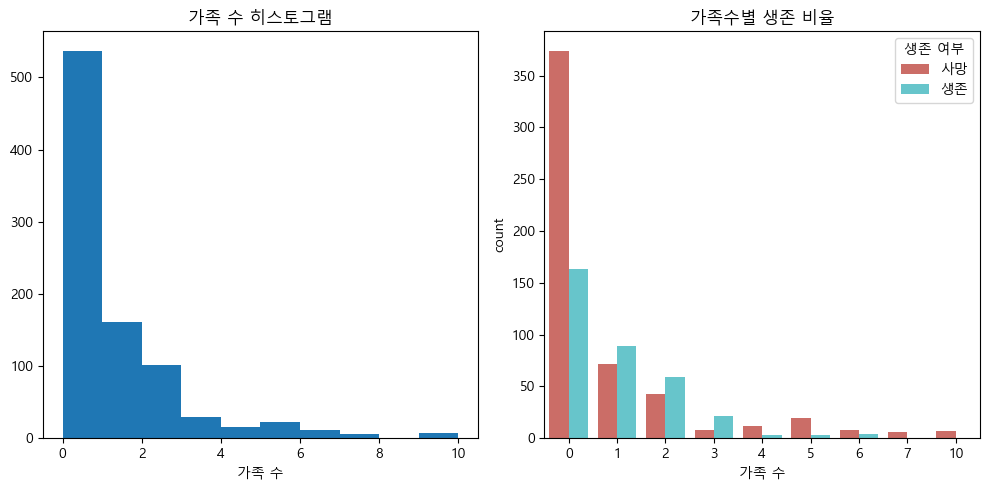

In [474]:
f,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(df['Fsize'])
ax[0].set_title('가족 수 히스토그램')
ax[0].set_xlabel('가족 수')

sns.countplot(data=df, x="Fsize", palette='hls', hue='Survived',ax=ax[1])
ax[1].set_title('가족수별 생존 비율')
ax[1].set_xlabel('가족 수')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

plt.tight_layout()
plt.show()

형제/자매/배우자와 부모/자식을 합쳐도, 60%에 가까운 승객이 혼자 탑승했음을 알 수 있다. 또한, 두 값을 합쳤음에도 3명이상의 가족과 탑승한 승객들의 비율이 10%를 조금 넘는다.

마찬가지로, 4명이상의 가족과 탑승한 승객들의 생존률이 매우 낮게 나타나고 있음을 알 수 있다.

## 3.머신러닝

### 3-1.결측치 처리 

머신러닝을 실행하기 전, 앞서 살펴보았던 Embarked, Age, Cabin에 대한결측치를 처리하려 한다.

#### 3-1-1. Embarked 결측치 처리 

In [475]:
df[df["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Initial,Fsize
PassengerId,,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,35-39,Miss,0
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,60-64,Mrs,0


In [476]:
df["Embarked"] = df["Embarked"].fillna("C")
df[df["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Initial,Fsize
PassengerId,,,,,,,,,,,,,,


Embarked, 승선항에 대한 결측치가 존재하는 행은 2개이다. 
72.4%의 승객이 사우스햄튼에서 승선하였고, 1등급 승객칸 역시, 사우스햄튼에서 승선한 승객이 제일 많으므로, 결측치를 사우스햄튼 승선으로 바꿔주겠다.

#### 3-1-2. Age 결측치 처리

In [477]:
df[df["Age"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Initial,Fsize
PassengerId,,,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,Mr,0
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,NaN,Mr,0
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,NaN,Mrs,0
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,NaN,Mr,0
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,NaN,Miss,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,NaN,Mr,0
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,Miss,10
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,NaN,Mr,0


In [478]:
df['Initial'] = df.Name.str.extract('([A-Za-z]+)\\.')

In [479]:
df['Initial']

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Initial, Length: 891, dtype: object

In [480]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [481]:
df['Initial'].replace({'Mlle': 'Miss','Ms': 'Miss'}, inplace=True)
df['Initial'].replace({'Mme': 'Mrs','Lady': 'Mrs','Countess': 'Mrs'}, inplace=True)
df['Initial'].replace({'Sir': 'Mr', 'Don': 'Mr', 'Capt': 'Mr', 'Major':'Mr','Col':'Mr','Rev':'Mr','Jonkheer': 'Mr'}, inplace=True)


In [482]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Dr,Master,Miss,Mr,Mrs
Sex,,,,,
female,1,0,185,0,128
male,6,40,0,531,0


In [483]:
df.groupby('Initial')['Age'].mean()

Initial
Dr        42.000000
Master     4.574167
Miss      21.845638
Mr        32.891990
Mrs       35.873874
Name: Age, dtype: float64

In [484]:
df.loc[(df.Age.isnull())&(df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull())&(df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.Initial=='Dr'),'Age']=42

In [485]:
df[df["Age"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Initial,Fsize
PassengerId,,,,,,,,,,,,,,


총 177명의 승객에 대한 나이 정보가 존재하지 않는 것을 알 수 있다.  승객들 이름의 호칭을 이용하여 나이를 채워주려한다.

mr, master, mrs, miss 등이 대부분이나, 다른 호칭을 가진 사람들이 존재한다. 이들의 의미를 검색하여, 적절하게 mrs,miss, mr로 재분배해 주었다.

dr, 의사 칭호는 1명의 여성과 6명의 남성이 가지고 있기에, 바꾸어 주지 않았다. 

그 후, mr, miss, mrs, master, dr 칭호를 가진 사람의 평균 나이를 계산하여 결측치를 채워주었다.

#### 3-1-3. Cabin 결측치 처리

In [486]:
df.drop('Cabin', axis=1, inplace=True)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Initial,Fsize
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,20-24,Mr,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,35-39,Mrs,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,25-29,Miss,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35-39,Mrs,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35-39,Mr,0


Embarkd는 2개, age는 177개로 20% 정도가 결측치였다. 그러나 Cabin은 절반 이상이 결측치이고, 한 승객이 C23 C25 C27 등 여러 개의 값을 가지므로, 제거하도록 하겠다.

### 3-2. 상관관계 분석 및 변수 선태

중요한 변수, 불필요한 변수를 제거하기 전, 상관관계를 분석하여, 상관관계가 높은 변수들을 제거해 다중 공선성 문제를 해결하려 한다.

In [487]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df['Initial'].replace(['Mr','Mrs','Miss','Master','Dr'],[0,1,2,3,4],inplace=True)


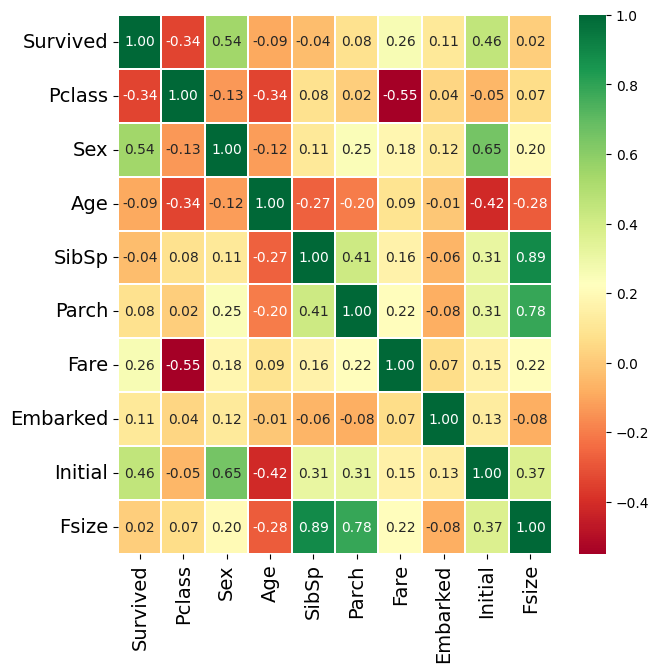

In [502]:
df_c=df.copy()
df_c.drop(['Name','Ticket','Age_group'],axis=1,inplace=True)

plt.rcParams['font.family'] = 'DejaVu Sans'
sns.heatmap(df_c.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10},fmt='.2f')
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

문자형 변수인 name과, ticket, 그리고 Age_group을 제거하고 상관계수를 출력해보았다.

Sex, Embarked, Initial의 상관계수를 파악하기 위해 수치형 데이터로 변환시켰다.

그 결과 Fsize와 SibSp, Parch가 0.7%이상으로 높은 상관관계를 보이고 있다.

모델을 훈련할때는 Fsize를 제거하여야 될 것 같다.


### 3-2. 모델 훈련

In [489]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

X = df.drop(['Survived', 'Name', 'Ticket','Age_group'], axis=1)  
Y = df['Survived']
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

#### 3-2-1. 로지스틱 회귀 

In [490]:
model = LogisticRegression(max_iter=1000)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('로지스틱 회귀 정확도:',metrics.accuracy_score(prediction1,test_Y))
print('로지스틱 회귀 혼동행렬:',confusion_matrix(prediction1,test_Y))

로지스틱 회귀 정확도: 0.8246268656716418
로지스틱 회귀 혼동행렬: [[152  34]
 [ 13  69]]


로지스틱 회귀를 실행했더니 정확도가 0.82%가 나왔다. 다른 모델을 학습시켜 정확도를 측정해보려한다.

#### 3-2-2. 의사결정 나무 

In [491]:
model=DecisionTreeClassifier(random_state=0)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('의사결정나무 정확도',metrics.accuracy_score(prediction2,test_Y))

의사결정나무 정확도 0.7723880597014925


의사결정나무는 0.8에 가까운 정확도를 보이고 있다.

#### 3-2-3. Knn 분류기 

In [492]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('Knn 모델 정확도',metrics.accuracy_score(prediction3,test_Y))

Knn 모델 정확도 0.7313432835820896


#### 3-2-4. 나이브 베이즈 분류기

In [493]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('나이브 분류기:',metrics.accuracy_score(prediction4,test_Y))

나이브 분류기: 0.8171641791044776


#### 3-2-5. 랜덤 포레스트 분류기 

In [494]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('랜덤 포레스트 분류기:',metrics.accuracy_score(prediction5,test_Y))

랜덤 포레스트 분류기: 0.835820895522388


In [495]:
df.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age_group    177
Initial        0
Fsize          0
dtype: int64

## 3-3. 앙상블 분석



In [496]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('AdaBoost 정확도',result.mean())

AdaBoost 정확도 0.8226966292134831
